In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [42]:
max_num_threads = 6
experiments = 3
nns = 5

data = np.full((max_num_threads, nns, experiments), np.nan)

for experiment in range(experiments):
    for i in range(len(data)):
        a = np.genfromtxt(f'../data/{experiment+1}.{i+1}.txt')
        data[i,:,experiment] = a[:,1]
        
ns = a[:,0]
threads = np.arange(1,max_num_threads+1)

Text(0, 0.5, 'Threads')

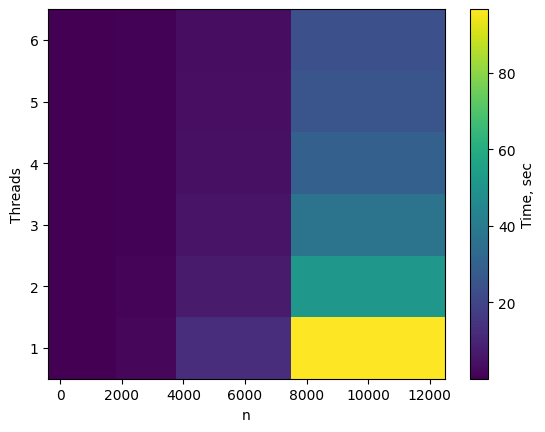

In [43]:
pcm = plt.pcolormesh(ns, threads, data.mean(axis=2))
plt.colorbar(pcm, label='Time, sec')
plt.xlabel('n')
plt.ylabel('Threads')

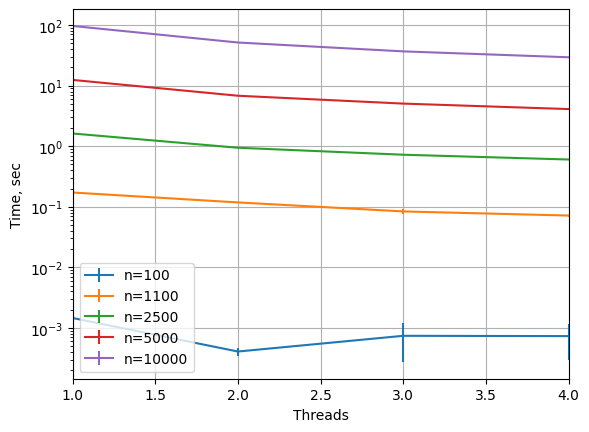

In [44]:
for i in range(nns):
    plt.errorbar(threads, data.mean(axis=2)[:,i], yerr=data.std(axis=2)[:,i],
                 label=f'n={int(ns[i]):}')
plt.grid()
plt.legend()
plt.xlim(1,4)
plt.yscale('log')
plt.xlabel('Threads')
plt.ylabel('Time, sec')
plt.savefig('t_vs_threads.png', dpi=250, bbox_inches='tight')

In [45]:
speedup = np.full((max_num_threads,nns),np.nan)
speedup_err = np.full((max_num_threads,nns),np.nan)
for i in range(len(data)):
    speedup[i] = data[0].mean(axis=-1) / data[i].mean(axis=-1)
    speedup_err[i] = (data[0].std(axis=-1)*data[i].mean(axis=-1) \
                      + data[0].mean(axis=-1)*data[i].std(axis=-1)) / (data[i].mean(axis=-1))**2

Text(0, 0.5, 'Threads')

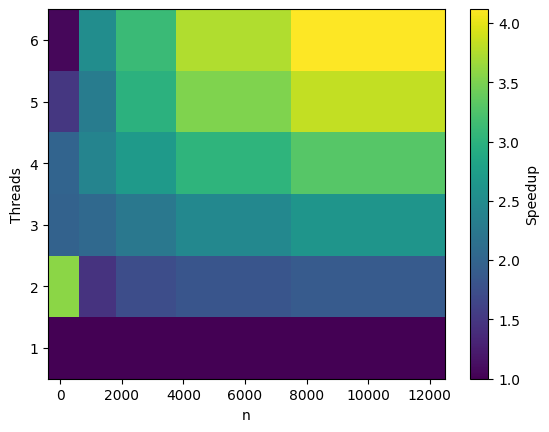

In [46]:
pcm = plt.pcolormesh(ns, threads, speedup)
plt.colorbar(pcm, label='Speedup')
plt.xlabel('n')
plt.ylabel('Threads')

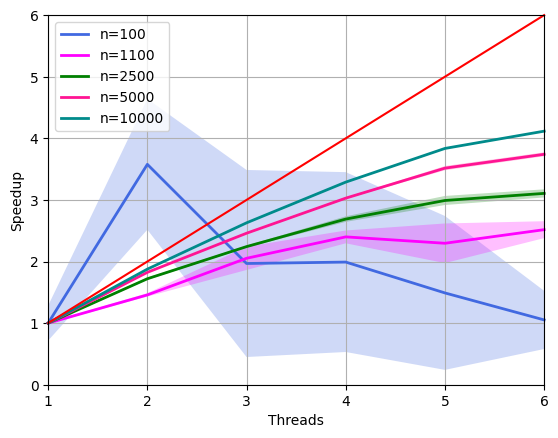

In [47]:
cs = ['royalblue', 'magenta', 'green', 'deeppink', 'darkcyan']
j = 0
for i in range(nns):
    plt.plot(threads, speedup[:,i],
             linewidth=2, clip_on=False, 
             label=f'n={int(ns[i])}', color=cs[j])
    plt.fill_between(threads,
                     speedup[:,i]+speedup_err[:,i],
                     speedup[:,i]-speedup_err[:,i],
                     color=cs[j], edgecolor=None, alpha=0.25)
    j+=1
plt.plot(threads, threads, clip_on=False, color='red')
plt.xlim(1,6)
plt.ylim(0,6)
plt.xticks(np.arange(1,7))
plt.yticks(np.arange(7))
plt.grid()
plt.xlabel('Threads')
plt.ylabel('Speedup')
plt.legend()
plt.savefig('speedup_vs_threads.png', dpi=250, bbox_inches='tight')

In [56]:
data[:,:,0]

array([[1.75368900e-03, 1.71143300e-01, 1.61907892e+00, 1.24330475e+01,
        9.67180916e+01],
       [3.66252000e-04, 1.20249132e-01, 9.48864777e-01, 6.82261582e+00,
        5.14782115e+01],
       [4.20807000e-04, 7.83315900e-02, 7.22635696e-01, 5.04867934e+00,
        3.67827408e+01],
       [1.34392100e-03, 6.93716680e-02, 6.13155616e-01, 4.09700420e+00,
        2.94490078e+01],
       [4.18970000e-04, 6.63611520e-02, 5.57673721e-01, 3.50482915e+00,
        2.51507678e+01],
       [1.03699200e-03, 7.31702550e-02, 5.25196393e-01, 3.35749908e+00,
        2.34907372e+01]])

In [88]:
for i in range(6):
    print(f"{data[i,4,2]:0.2e}")

9.66e+01
5.17e+01
3.68e+01
2.94e+01
2.53e+01
2.35e+01
